<a href="https://colab.research.google.com/github/ChaelinL/Deeplearning_for_everyone/blob/main/18%EC%9E%A5_%EC%8B%A4%EC%8A%B5(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LSTM과 CNN의 조합을 이용한 영화 리뷰 분석

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Embedding, LSTM, Conv1D, MaxPooling1D
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.callbacks import EarlyStopping

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 데이터를 학습셋, 테스트셋으로 나누기
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=5000)

# 단어의 수 맞추기
X_train = sequence.pad_sequences(X_train, maxlen=500)
X_test = sequence.pad_sequences(X_test, maxlen=500)

In [3]:
# 모델 구조 설정
model = Sequential()
model.add(Embedding(5000, 100))
model.add(Dropout(0.5))
model.add(Conv1D(64, 5, padding='valid', activation='relu', strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(55))
model.add(Dense(1))
model.add(Activation('sigmoid'))

# 모델 실행 옵션 설정
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 학습 조기 중단 설정
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3)

In [4]:
# 모델 실행
history = model.fit(X_train, y_train, batch_size=40, epochs=100, validation_split=0.25, callbacks=[early_stopping_callback])

# 테스트 정확도 출력
print(f'Test Accuracy: {round(model.evaluate(X_test, y_test)[1], 4)}')

Epoch 1/100
469/469 [==============================] - 69s 122ms/step - loss: 0.4067 - accuracy: 0.8038 - val_loss: 0.2784 - val_accuracy: 0.8878
Epoch 2/100
469/469 [==============================] - 19s 41ms/step - loss: 0.2351 - accuracy: 0.9082 - val_loss: 0.2620 - val_accuracy: 0.8906
Epoch 3/100
469/469 [==============================] - 14s 30ms/step - loss: 0.1919 - accuracy: 0.9268 - val_loss: 0.2694 - val_accuracy: 0.8890
Epoch 4/100
469/469 [==============================] - 11s 23ms/step - loss: 0.1456 - accuracy: 0.9485 - val_loss: 0.2863 - val_accuracy: 0.8920
Epoch 5/100
782/782 [==============================] - 3s 4ms/step - loss: 0.3278 - accuracy: 0.8780
Test Accuracy: 0.878


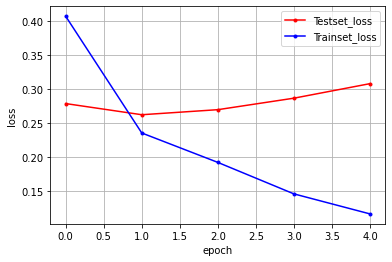

In [5]:
# 검증셋과 학습셋의 오차 저장
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 시각화하기
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

**==> 이때, 어텐션 사용시 정확도 높일 수 있음**

모델에 Attention() 함수 추가하면 코드는 동일